In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal

On a finite grid of length \\(L\\) and nodes \\(j=0,\ldots,N\\), \\(h=L/N\\), the supported Fourier modes have wavelenghts \\(\lambda_n=L/n,\;n=0,\ldots,N/2\\), and the corresponding reduced wavenumbers are \\(\varphi_n=2\pi n/N\\), and \\(0\leq\varphi_n\leq\pi\\):

In [2]:
# Domain length
L = 2.0 * np.pi

In [3]:
# Number of grid points
N = 64

In [4]:
# (Uniform) grid spacing
h = L / N

In [5]:
# Wavelenghts of supported Fourier modes
n = np.arange(N/2+1)
ln = L/n

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
# (Angular) wavenumbers
w = 2*np.pi/ln

In [7]:
# Reduced wavenumbers
pn = 2 * np.pi * n/N

In [8]:
# Positions of grid points j
x = np.linspace(0, L, N)

In [9]:
# Time step size
dt = 1e-6

In [10]:
# Discretized initial condition (single sinusoidal waves)
v0 = 1.0 * np.exp(1j * np.outer(w,x))
v0[0,:] = 0

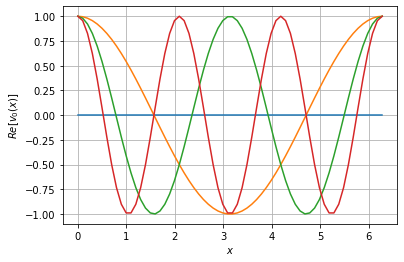

In [11]:
# Plot the initial sinusodial waves
for i in v0[:4]:
    plt.plot(x, np.real(i))
plt.xlabel('$x$')
plt.ylabel('$Re[v_0(x)]$')
plt.grid(True)
plt.show()

In [12]:
# First stage of SSP-RK3 time stepping scheme
phi = v0

# Backward differencing
phiR = phi
phiL = np.roll(phiR, 1)
DphiDx = (phiR - phiL) / h

v1 = v0 + dt * DphiDx

In [13]:
# Second stage of SSP-RK3 time stepping scheme
phi = v1

# Backward differencing
phiR = phi
phiL = np.roll(phiR, 1)
DphiDx = (phiR - phiL) / h

v2 = 3/4*v0 + 1/4*v1 + 1/4*dt*DphiDx

In [14]:
# Third stage of SSP-RK3 time stepping scheme
phi = v2

# Backward differencing
phiR = phi
phiL = np.roll(phiR, 1)
DphiDx = (phiR - phiL) / h

v3 = 1/3*v0 + 2/3*v2 + 2/3*dt*DphiDx

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


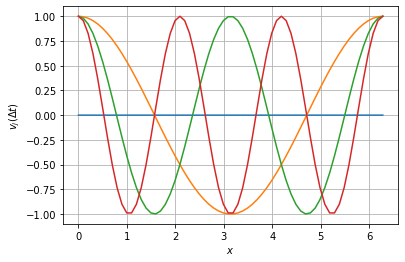

In [15]:
# Plot the results
for i in v3[:4]:
    plt.plot(x, i)
plt.xlabel('$x$')
plt.ylabel('$v_j(\Delta t)$')
plt.grid(True)
plt.show()

The DFT of the solution at \\(\varphi_n\\) is evaluated according to
\begin{align}
\hat{v}(\varphi_n;\tau)=\frac{1}{N}\sum_{j=0}^{N-1}v_j(\tau)e^{-ij\varphi_n}\tag{10}
\end{align}

In [16]:
# Discrete Fourier transform of the computed solution
#vhat = np.fft.fft(v3)
vhat = np.zeros(0)
for r in range(n.size):
    tmp = 0
    for j in range(N):
        tmp = tmp + v3[r,j] * np.exp(-1j * j * pn[r])
    tmp = tmp * 1/N
    vhat = np.append(vhat,tmp)

In [17]:
# Discrete Fourier transform of the initial condition
v0hat = np.zeros(0)
for r in range(n.size):
    tmp = 0
    for j in range(N):
        tmp = tmp + v0[r,j] * np.exp(-1j * j * pn[r])
    tmp = tmp * 1/N
    v0hat = np.append(v0hat,tmp)

Then, relation \\((9)\\) is exploited to define a modified wavenumber for all supported modes:
\begin{align}
\Phi(\varphi_n)=-\frac{1}{i\sigma}\log\left(\frac{\hat{v}(\varphi_n;\tau)}{\hat{v}_0(\varphi_n)}\right)\tag{11}
\end{align}

In [19]:
sigma = dt/h

In [20]:
Phi = 1.0/(1j*sigma)*np.log(vhat/v0hat) # Sign?

# Correct zero element
Phi[0] = 0

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in multiply
  """Entry point for launching an IPython kernel.


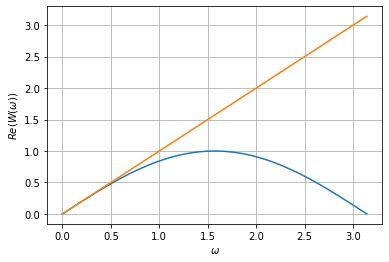

In [21]:
# Plot the real part of the modified wavenumber
plt.plot(pn,np.real(Phi))
plt.plot(pn,pn)
plt.xlabel('$\omega$')
plt.ylabel('$Re(W(\omega))$')
plt.grid(True)
plt.show()

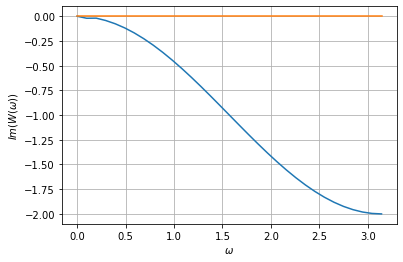

In [22]:
# Plot the imaginary part of the modified wavenumber
plt.plot(pn,np.imag(Phi))
plt.plot(pn,np.zeros(pn.size))
plt.xlabel('$\omega$')
plt.ylabel('$Im(W(\omega))$')
plt.grid(True)
plt.show()